In [1]:
import pysrm3 as p
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools as it

X :1.003847268177541,Y :0.0360016178321309,Cs :0.25,Cp :0.7000000000000001,ddf :0.3
X :1.0630744638481509,Y :0.0468598476174857,Cs :0.35,Cp :0.15,ddf :0.95
X :0.8793612998375093,Y :0.0021753589072561,Cs :0.35,Cp :0.45,ddf :0.8500000000000001
X :1.2286680422003822,Y :0.1073602927181966,Cs :0.3,Cp :0.55,ddf :0.9000000000000001
X :1.3226781669412129,Y :0.0728659695338579,Cs :0.5,Cp :0.2,ddf :0.95


KeyError: 2006

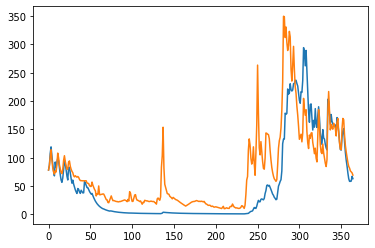

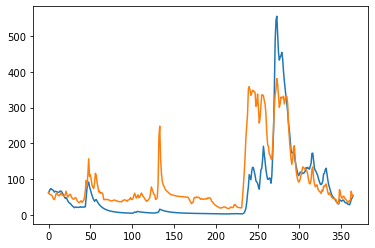

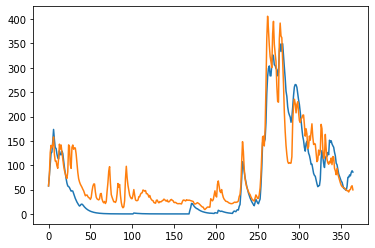

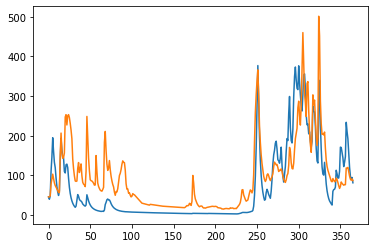

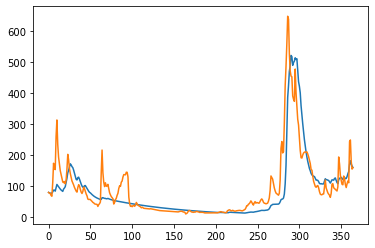

In [2]:
years = range(2001,2020)

bas = 6731907


model_cal = []
measure_cal = []

for year in years:

    c = p.Setup_Model(basin = str(bas),path = 'D:/Master_Thesis/Model',info = 'DEM_Statistics_all_basins',height = 'Synth_Station_Heights',stations = 'Meteo_Stations_Info',year = year).get_data()

    d = p.Model(x = c)
    
    plt.figure()
    plt.plot(d[0])
    plt.plot(d[1])

X :2.1028907495902773,Y :0.1119582739747359,Cs :0.29,Cp :0.4299999999999999,ddf :0.57


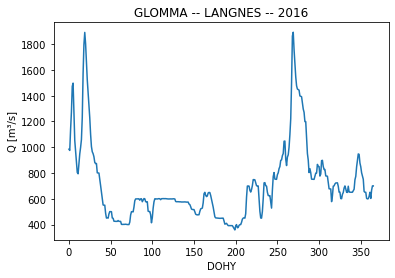

In [25]:
bas = 6729400
year = 2016

c = p.Setup_Model(basin = str(bas),path = 'D:/Master_Thesis/Model',info = 'DEM_Statistics_all_basins',height = 'Synth_Station_Heights',stations = 'Meteo_Stations_Info',year = year).get_data()
d = p.Model(x = c)

plt.figure()
plt.plot(d[1])
plt.title('GLOMMA -- LANGNES -- 2016')
plt.ylabel('Q [m³/s]')
plt.xlabel('DOHY')
plt.savefig('C:/Users/Marius/Desktop/Glomma.png', dpi = 300, bbox_inches = 'tight')

X :0.9607612380680496,Y :0.0646636474432059,Cs :0.13,Cp :0.5499999999999999,ddf :0.4299999999999999


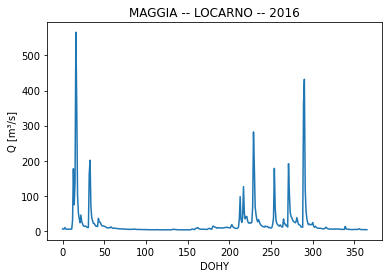

In [24]:
bas = 6948120
year = 2016

c = p.Setup_Model(basin = str(bas),path = 'D:/Master_Thesis/Model',info = 'DEM_Statistics_all_basins',height = 'Synth_Station_Heights',stations = 'Meteo_Stations_Info',year = year).get_data()
d = p.Model(x = c)

plt.figure()
plt.plot(d[1])
plt.title('MAGGIA -- LOCARNO -- 2016')
plt.ylabel('Q [m³/s]')
plt.xlabel('DOHY')

plt.savefig('C:/Users/Marius/Desktop/Maggia.png', dpi = 300, bbox_inches = 'tight')

In [19]:
tmp = pd.read_csv('D:/Master_Thesis/Model/Useful_Catchments.csv')
#tmp['Number'] == '3'
tmp['GRDC'][29]

6730500

X :1.2,Y :0.054,Cs :0.66,Cp :0.079,ddf :0.51
X :1.2,Y :0.054,Cs :0.66,Cp :0.079,ddf :0.51
X :1.2,Y :0.054,Cs :0.66,Cp :0.079,ddf :0.51
X :1.2,Y :0.054,Cs :0.66,Cp :0.079,ddf :0.51
X :1.2,Y :0.054,Cs :0.66,Cp :0.079,ddf :0.51
X :1.2,Y :0.054,Cs :0.66,Cp :0.079,ddf :0.51
X :1.2,Y :0.054,Cs :0.66,Cp :0.079,ddf :0.51
X :1.2,Y :0.054,Cs :0.66,Cp :0.079,ddf :0.51
X :1.2,Y :0.054,Cs :0.66,Cp :0.079,ddf :0.51
X :1.2,Y :0.054,Cs :0.66,Cp :0.079,ddf :0.51
X :1.2,Y :0.054,Cs :0.66,Cp :0.079,ddf :0.51
X :1.2,Y :0.054,Cs :0.66,Cp :0.079,ddf :0.51
X :1.2,Y :0.054,Cs :0.66,Cp :0.079,ddf :0.51
X :1.2,Y :0.054,Cs :0.66,Cp :0.079,ddf :0.51
X :1.2,Y :0.054,Cs :0.66,Cp :0.079,ddf :0.51


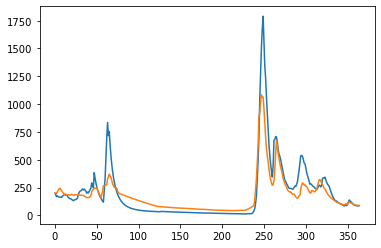

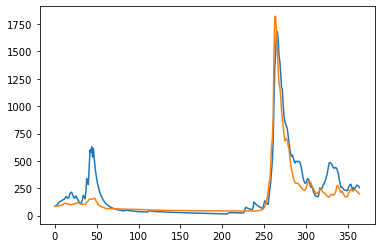

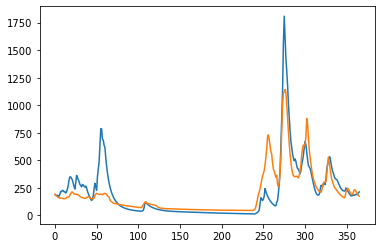

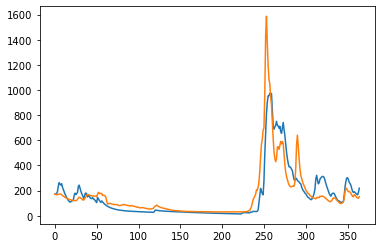

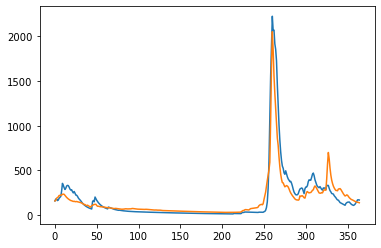

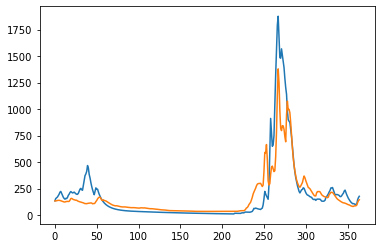

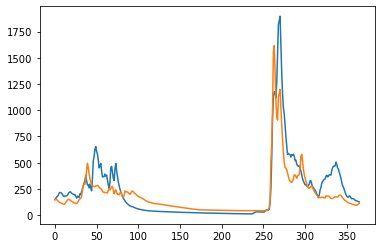

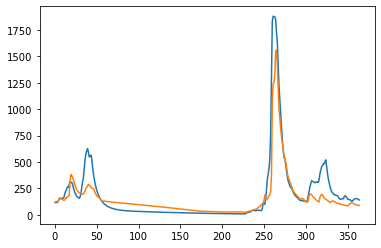

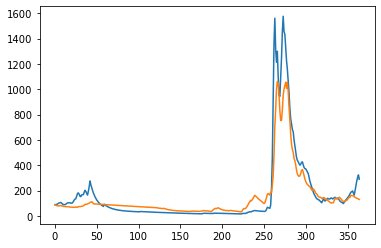

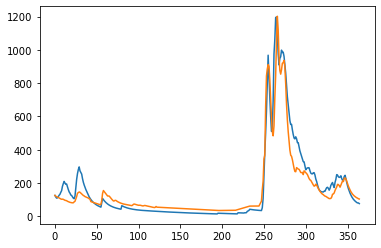

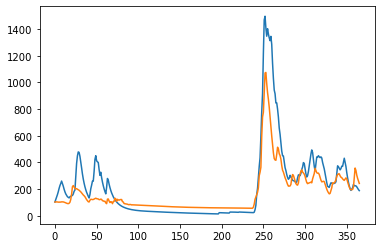

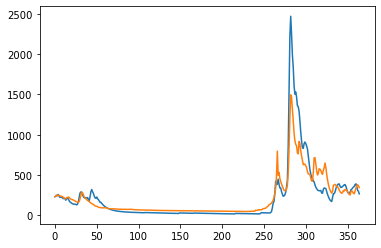

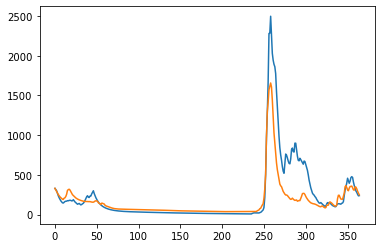

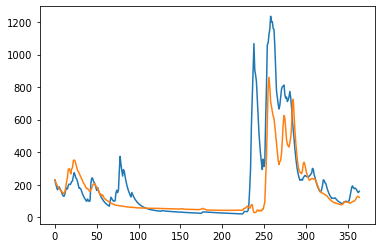

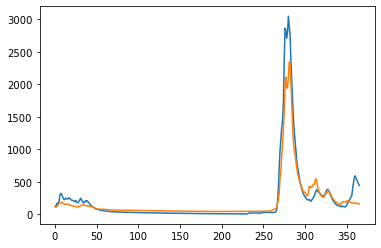

In [20]:
years = range(2006,2021)

bas = 6730500

model_val = []
measure_val = []

summary = p.Setup_Model(basin = bas,path = 'D:/Master_Thesis/Model',info = 'DEM_Statistics_all_basins',height = 'Synth_Station_Heights',
                 stations = 'Meteo_Stations_Info').param_summary()
parameters = summary['Mean'].drop(labels = 'R2').to_list()

for year in years:


    c = p.Setup_Model(basin = bas,path = 'D:/Master_Thesis/Model',info = 'DEM_Statistics_all_basins',height = 'Synth_Station_Heights',stations = 'Meteo_Stations_Info',year = year).get_data_free()

    d = p.Model_free(p = parameters, x = c)
    
    plt.figure()
    plt.plot(d[0])
    plt.plot(d[1])


In [5]:
basin_csv = pd.read_csv('D:/Master_Thesis/Model/Useful_Catchments.csv')
basin_csv = basin_csv[basin_csv['Include'] == 'y']
basin_csv['GRDC'].tolist()

40

In [6]:
# Get Model results for Calibration Period

basin_csv = pd.read_csv('D:/Master_Thesis/Model/Useful_Catchments.csv')
basin_csv = basin_csv[basin_csv['Include'] == 'y']
basins = basin_csv['GRDC'].tolist()

for bas in basins:

    years = range(2001,2006)

    model_cal = []
    measure_cal = []

    for year in years:

        c = p.Setup_Model(basin = str(bas),path = 'D:/Master_Thesis/Model',info = 'DEM_Statistics_all_basins',height = 'Synth_Station_Heights',stations = 'Meteo_Stations_Info',year = year).get_data()

        d = p.Model(x = c)

        model_cal.extend(d[0])
        measure_cal.extend(d[1])

    # Get Model results for Validation Period

    years = range(2006,2021)

    model_val = []
    measure_val = []

    summary = p.Setup_Model(basin = str(bas),path = 'D:/Master_Thesis/Model',info = 'DEM_Statistics_all_basins',height = 'Synth_Station_Heights',
                     stations = 'Meteo_Stations_Info').param_summary()
    parameters = summary['Mean'].drop(labels = 'R2').to_list()

    for year in years:


        c = p.Setup_Model(basin = bas,path = 'D:/Master_Thesis/Model',info = 'DEM_Statistics_all_basins',height = 'Synth_Station_Heights',stations = 'Meteo_Stations_Info',year = year).get_data_free()

        d = p.Model_free(p = parameters, x = c)

        model_val.extend(d[0])
        measure_val.extend(d[1])

    # Add both lists together
    model = []
    measure = []

    model = model_cal + model_val
    measure = measure_cal + measure_val
    datelist = pd.date_range('2000-09-01', periods=len(measure), freq="D").tolist()

    # Create Dataframe
    df = pd.DataFrame(list(zip(datelist, model, measure)),columns =['Date', 'Model', 'Measure'])
    df.to_csv('D:/Master_Thesis/Model/{0}/pySRM_sim.csv'.format(bas), index = False)

    
    
# Read in the other Model results from GR4J
df_nosca = pd.read_csv('D:/Master_Thesis/Model/{0}/Sim_GR4J_noSCA.csv'.format(bas))
df_sca_nohyst = pd.read_csv('D:/Master_Thesis/Model/{0}/Sim_GR4J_SCA_noHyst.csv'.format(bas))
df_sca_hyst = pd.read_csv('D:/Master_Thesis/Model/{0}/Sim_GR4J_SCA_Hyst.csv'.format(bas))

df_nosca['Date'] = pd.to_datetime(df_nosca['Date'])
df_sca_nohyst['Date'] = pd.to_datetime(df_sca_nohyst['Date'])
df_sca_hyst['Date'] = pd.to_datetime(df_sca_hyst['Date'])

X :0.9262993641106028,Y :0.0008358417783934,Cs :0.8500000000000001,Cp :0.55,ddf :0.2
X :0.9559273809903076,Y :0.0025590839788123,Cs :0.3,Cp :0.2,ddf :0.8500000000000001
X :0.9380194776156966,Y :0.0031788028587241,Cs :0.95,Cp :0.3,ddf :0.2
X :0.9409325927340494,Y :0.0058947920991829,Cs :0.8,Cp :0.05,ddf :0.15
X :0.9476637081274542,Y :0.0049386423898831,Cs :0.7500000000000001,Cp :0.4,ddf :0.2
X :0.941,Y :0.003,Cs :0.73,Cp :0.3,ddf :0.319
X :0.941,Y :0.003,Cs :0.73,Cp :0.3,ddf :0.319
X :0.941,Y :0.003,Cs :0.73,Cp :0.3,ddf :0.319
X :0.941,Y :0.003,Cs :0.73,Cp :0.3,ddf :0.319
X :0.941,Y :0.003,Cs :0.73,Cp :0.3,ddf :0.319
X :0.941,Y :0.003,Cs :0.73,Cp :0.3,ddf :0.319
X :0.941,Y :0.003,Cs :0.73,Cp :0.3,ddf :0.319
X :0.941,Y :0.003,Cs :0.73,Cp :0.3,ddf :0.319
X :0.941,Y :0.003,Cs :0.73,Cp :0.3,ddf :0.319
X :0.941,Y :0.003,Cs :0.73,Cp :0.3,ddf :0.319
X :0.941,Y :0.003,Cs :0.73,Cp :0.3,ddf :0.319
X :0.941,Y :0.003,Cs :0.73,Cp :0.3,ddf :0.319
X :0.941,Y :0.003,Cs :0.73,Cp :0.3,ddf :0.319
X :0.941

X :1.139,Y :0.061,Cs :0.38,Cp :0.18,ddf :0.59
X :1.139,Y :0.061,Cs :0.38,Cp :0.18,ddf :0.59
X :1.139,Y :0.061,Cs :0.38,Cp :0.18,ddf :0.59
X :1.139,Y :0.061,Cs :0.38,Cp :0.18,ddf :0.59
X :1.139,Y :0.061,Cs :0.38,Cp :0.18,ddf :0.59
X :1.139,Y :0.061,Cs :0.38,Cp :0.18,ddf :0.59
X :1.139,Y :0.061,Cs :0.38,Cp :0.18,ddf :0.59
X :0.9979642144617408,Y :0.0263960286289775,Cs :0.8500000000000001,Cp :0.25,ddf :0.4
X :0.9590846172074596,Y :0.011638683110944,Cs :0.95,Cp :0.35,ddf :0.25
X :0.6160431370880887,Y :0.1160349326426513,Cs :0.3,Cp :0.05,ddf :0.05
X :0.9120503821884036,Y :0.0041667183024132,Cs :0.7500000000000001,Cp :0.25,ddf :0.2
X :0.99240170960501,Y :0.0163231552574578,Cs :0.8,Cp :0.1,ddf :0.3
X :0.895,Y :0.034,Cs :0.73,Cp :0.2,ddf :0.24
X :0.895,Y :0.034,Cs :0.73,Cp :0.2,ddf :0.24
X :0.895,Y :0.034,Cs :0.73,Cp :0.2,ddf :0.24
X :0.895,Y :0.034,Cs :0.73,Cp :0.2,ddf :0.24
X :0.895,Y :0.034,Cs :0.73,Cp :0.2,ddf :0.24
X :0.895,Y :0.034,Cs :0.73,Cp :0.2,ddf :0.24
X :0.895,Y :0.034,Cs :0.73,Cp

X :1.041,Y :0.026,Cs :0.75,Cp :0.129,ddf :0.27
X :1.041,Y :0.026,Cs :0.75,Cp :0.129,ddf :0.27
X :1.041,Y :0.026,Cs :0.75,Cp :0.129,ddf :0.27
X :1.041,Y :0.026,Cs :0.75,Cp :0.129,ddf :0.27
X :1.041,Y :0.026,Cs :0.75,Cp :0.129,ddf :0.27
X :1.041,Y :0.026,Cs :0.75,Cp :0.129,ddf :0.27
X :1.041,Y :0.026,Cs :0.75,Cp :0.129,ddf :0.27
X :1.041,Y :0.026,Cs :0.75,Cp :0.129,ddf :0.27
X :1.041,Y :0.026,Cs :0.75,Cp :0.129,ddf :0.27
X :1.041,Y :0.026,Cs :0.75,Cp :0.129,ddf :0.27
X :1.041,Y :0.026,Cs :0.75,Cp :0.129,ddf :0.27
X :1.041,Y :0.026,Cs :0.75,Cp :0.129,ddf :0.27
X :1.041,Y :0.026,Cs :0.75,Cp :0.129,ddf :0.27
X :1.041,Y :0.026,Cs :0.75,Cp :0.129,ddf :0.27
X :1.041,Y :0.026,Cs :0.75,Cp :0.129,ddf :0.27
X :1.0340174339651655,Y :0.0156467355129852,Cs :0.4,Cp :0.3,ddf :0.7000000000000001
X :1.1103028970965805,Y :0.0273041754783148,Cs :0.45,Cp :0.45,ddf :0.55
X :1.0160473947587076,Y :0.0113139701774476,Cs :0.95,Cp :0.45,ddf :0.1
X :1.0691303607140568,Y :0.0221788883670535,Cs :0.9000000000000001,C

X :0.9962518318492962,Y :0.0659104286213327,Cs :0.45,Cp :0.2,ddf :0.4
X :0.9775320548698258,Y :0.031234068381404,Cs :0.6500000000000001,Cp :0.15,ddf :0.35
X :0.980144198267104,Y :0.044755051480105,Cs :0.6500000000000001,Cp :0.4,ddf :0.25
X :1.0679775263956364,Y :0.0958559906968805,Cs :0.5,Cp :0.1,ddf :0.4
X :0.960004734237265,Y :0.0307655988708086,Cs :0.7000000000000001,Cp :0.2,ddf :0.4
X :0.996,Y :0.053,Cs :0.59,Cp :0.21,ddf :0.36
X :0.996,Y :0.053,Cs :0.59,Cp :0.21,ddf :0.36
X :0.996,Y :0.053,Cs :0.59,Cp :0.21,ddf :0.36
X :0.996,Y :0.053,Cs :0.59,Cp :0.21,ddf :0.36
X :0.996,Y :0.053,Cs :0.59,Cp :0.21,ddf :0.36
X :0.996,Y :0.053,Cs :0.59,Cp :0.21,ddf :0.36
X :0.996,Y :0.053,Cs :0.59,Cp :0.21,ddf :0.36
X :0.996,Y :0.053,Cs :0.59,Cp :0.21,ddf :0.36
X :0.996,Y :0.053,Cs :0.59,Cp :0.21,ddf :0.36
X :0.996,Y :0.053,Cs :0.59,Cp :0.21,ddf :0.36
X :0.996,Y :0.053,Cs :0.59,Cp :0.21,ddf :0.36
X :0.996,Y :0.053,Cs :0.59,Cp :0.21,ddf :0.36
X :0.996,Y :0.053,Cs :0.59,Cp :0.21,ddf :0.36
X :0.996,Y :

X :0.845,Y :0.071,Cs :0.44,Cp :0.49,ddf :0.55
X :0.845,Y :0.071,Cs :0.44,Cp :0.49,ddf :0.55
X :0.845,Y :0.071,Cs :0.44,Cp :0.49,ddf :0.55
X :0.845,Y :0.071,Cs :0.44,Cp :0.49,ddf :0.55
X :0.845,Y :0.071,Cs :0.44,Cp :0.49,ddf :0.55
X :0.845,Y :0.071,Cs :0.44,Cp :0.49,ddf :0.55
X :0.845,Y :0.071,Cs :0.44,Cp :0.49,ddf :0.55
X :0.845,Y :0.071,Cs :0.44,Cp :0.49,ddf :0.55
X :1.003847268177541,Y :0.0360016178321309,Cs :0.25,Cp :0.7000000000000001,ddf :0.3
X :1.0630744638481509,Y :0.0468598476174857,Cs :0.35,Cp :0.15,ddf :0.95
X :0.8793612998375093,Y :0.0021753589072561,Cs :0.35,Cp :0.45,ddf :0.8500000000000001
X :1.2286680422003822,Y :0.1073602927181966,Cs :0.3,Cp :0.55,ddf :0.9000000000000001
X :1.3226781669412129,Y :0.0728659695338579,Cs :0.5,Cp :0.2,ddf :0.95
X :1.099,Y :0.053,Cs :0.35,Cp :0.41,ddf :0.79
X :1.099,Y :0.053,Cs :0.35,Cp :0.41,ddf :0.79
X :1.099,Y :0.053,Cs :0.35,Cp :0.41,ddf :0.79
X :1.099,Y :0.053,Cs :0.35,Cp :0.41,ddf :0.79
X :1.099,Y :0.053,Cs :0.35,Cp :0.41,ddf :0.79
X :1.

X :1.0926397118265971,Y :0.0321235484949851,Cs :0.7000000000000001,Cp :0.15,ddf :0.25
X :1.121,Y :0.039,Cs :0.63,Cp :0.17,ddf :0.25
X :1.121,Y :0.039,Cs :0.63,Cp :0.17,ddf :0.25
X :1.121,Y :0.039,Cs :0.63,Cp :0.17,ddf :0.25
X :1.121,Y :0.039,Cs :0.63,Cp :0.17,ddf :0.25
X :1.121,Y :0.039,Cs :0.63,Cp :0.17,ddf :0.25
X :1.121,Y :0.039,Cs :0.63,Cp :0.17,ddf :0.25
X :1.121,Y :0.039,Cs :0.63,Cp :0.17,ddf :0.25
X :1.121,Y :0.039,Cs :0.63,Cp :0.17,ddf :0.25
X :1.121,Y :0.039,Cs :0.63,Cp :0.17,ddf :0.25
X :1.121,Y :0.039,Cs :0.63,Cp :0.17,ddf :0.25
X :1.121,Y :0.039,Cs :0.63,Cp :0.17,ddf :0.25
X :1.121,Y :0.039,Cs :0.63,Cp :0.17,ddf :0.25
X :1.121,Y :0.039,Cs :0.63,Cp :0.17,ddf :0.25
X :1.121,Y :0.039,Cs :0.63,Cp :0.17,ddf :0.25
X :1.121,Y :0.039,Cs :0.63,Cp :0.17,ddf :0.25
X :0.9755807516149008,Y :0.0193656509220475,Cs :0.95,Cp :0.25,ddf :0.1
X :1.0273231715597133,Y :0.053436048138514,Cs :0.7000000000000001,Cp :0.1,ddf :0.3
X :0.8633115134885038,Y :0.0330045065141645,Cs :0.3,Cp :0.2,ddf :0.3
X

D:\miniconda3\envs\master_thesis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<Figure size 432x288 with 0 Axes>

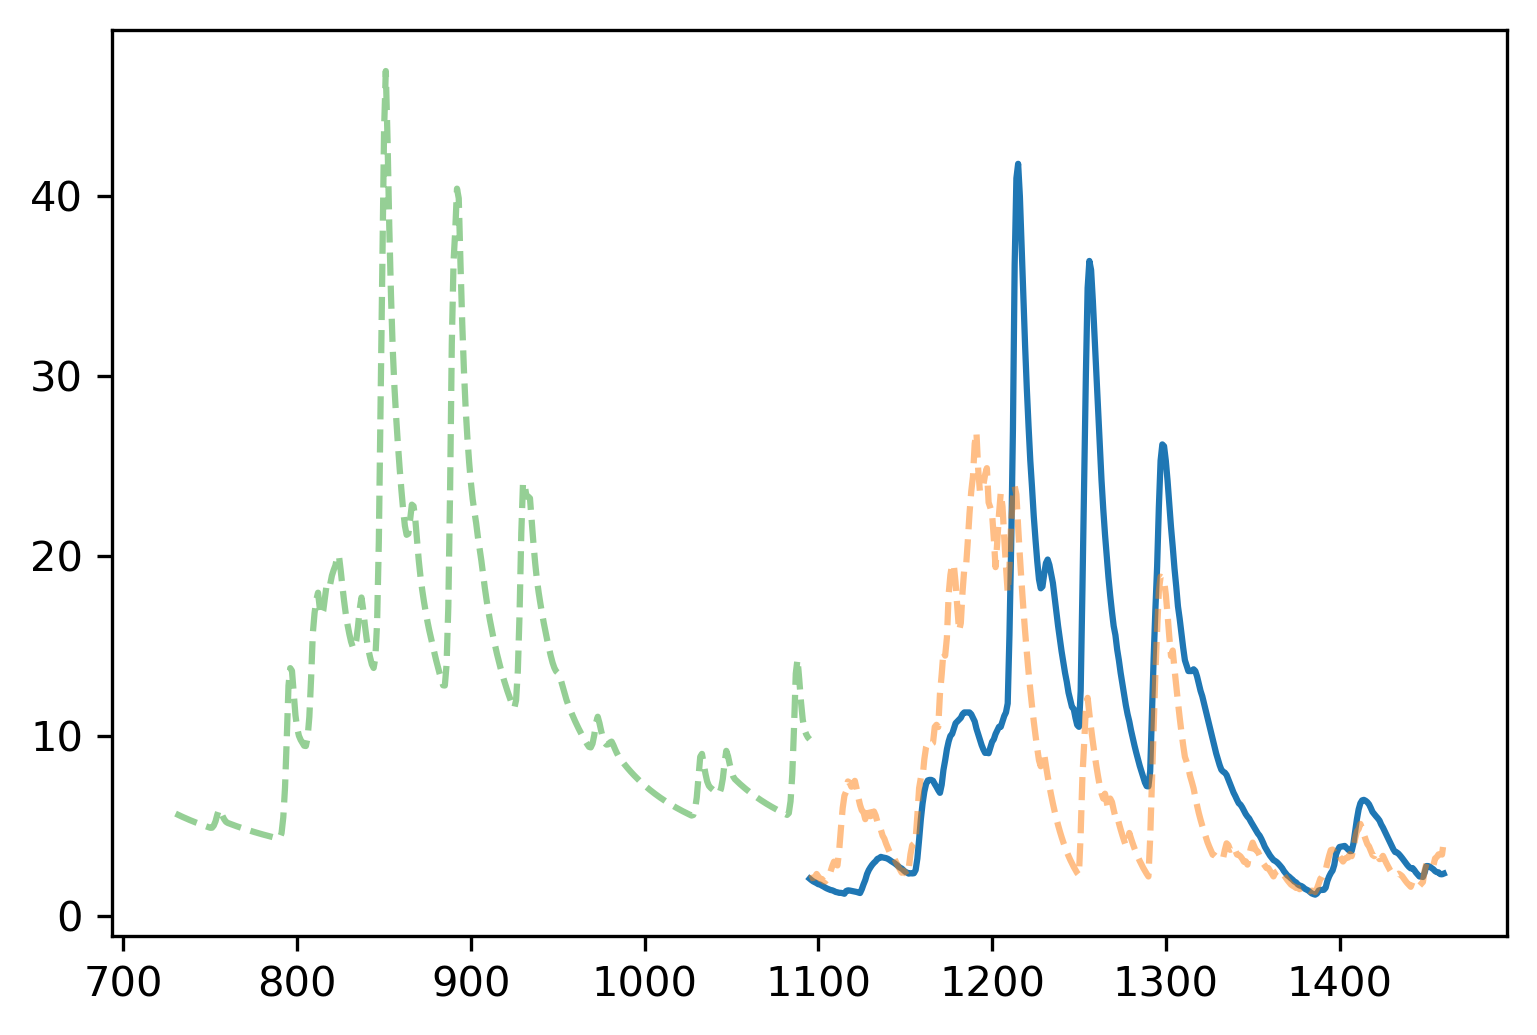

In [53]:
num = '1'

basin_csv = pd.read_csv('D:/Master_Thesis/Model/Useful_Catchments.csv')
basin_csv = basin_csv[basin_csv['Include'] == 'y']
single_bas = basin_csv[basin_csv['Number'] == num]
bas = single_bas['GRDC'][0]


df = pd.read_csv('D:/Master_Thesis/Model/{0}/pySRM_sim.csv'.format(bas))

# Read in the other Model results from GR4J
df_nosca = pd.read_csv('D:/Master_Thesis/Model/{0}/Sim_GR4J_noSCA.csv'.format(bas))
df_sca_nohyst = pd.read_csv('D:/Master_Thesis/Model/{0}/Sim_GR4J_SCA_noHyst.csv'.format(bas))
df_sca_hyst = pd.read_csv('D:/Master_Thesis/Model/{0}/Sim_GR4J_SCA_Hyst.csv'.format(bas))

df_nosca['Date'] = pd.to_datetime(df_nosca['Date'])
df_sca_nohyst['Date'] = pd.to_datetime(df_sca_nohyst['Date'])
df_sca_hyst['Date'] = pd.to_datetime(df_sca_hyst['Date'])

start = '2003-09-01'
stop = '2004-08-31'


GR4J_tmp = df_nosca[(df_nosca['Date']>= start) & (df_nosca['Date']<= stop)]
GR4J_SCA_tmp = df_sca_nohyst[(df_sca_nohyst['Date']>= start) & (df_sca_nohyst['Date']<= stop)]
GR4J_SCA_Hyst_tmp = df_sca_hyst[(df_sca_hyst['Date']>= start) & (df_sca_hyst['Date']<= stop)]
pySRM_tmp = df[(df['Date']>= start) & (df['Date']<= stop)]


dohy = range(1,len(GR4J_tmp)+1)

GR4J_tmp['DOHY'] = dohy
GR4J_SCA_tmp['DOHY'] = dohy
GR4J_SCA_Hyst_tmp['DOHY'] = dohy
pySRM_tmp['DOHY'] = dohy

GR4J_tmp.columns = ['Date','Model_mm','GRDC','Model','DOHY']
GR4J_SCA_tmp.columns = ['Date','Model_mm','GRDC','Model','DOHY']
GR4J_SCA_Hyst_tmp.columns = ['Date','Model_mm','GRDC','Model','DOHY']


D:\miniconda3\envs\master_thesis\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


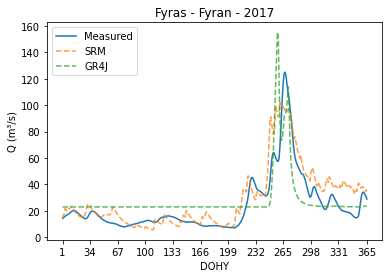

In [33]:
num = '11'
year = 2017


basin_csv = pd.read_csv('D:/Master_Thesis/Model/Useful_Catchments.csv')
basin_csv = basin_csv[basin_csv['Include'] == 'y']
single_bas = basin_csv[basin_csv['Number'] == num]
bas = single_bas['GRDC'].item()
name = single_bas['Name'].item()
river = single_bas['River'].item()
#river = 'Klarälven'

df = pd.read_csv('D:/Master_Thesis/Model/{0}/pySRM_sim.csv'.format(bas))

# Read in the other Model results from GR4J
df_nosca = pd.read_csv('D:/Master_Thesis/Model/{0}/Sim_GR4J_noSCA.csv'.format(bas))
df_sca_nohyst = pd.read_csv('D:/Master_Thesis/Model/{0}/Sim_GR4J_SCA_noHyst.csv'.format(bas))
df_sca_hyst = pd.read_csv('D:/Master_Thesis/Model/{0}/Sim_GR4J_SCA_Hyst.csv'.format(bas))

df_nosca['Date'] = pd.to_datetime(df_nosca['Date'])
df_sca_nohyst['Date'] = pd.to_datetime(df_sca_nohyst['Date'])
df_sca_hyst['Date'] = pd.to_datetime(df_sca_hyst['Date'])

start = '{0}-09-01'.format(year-1)
stop = '{0}-08-31'.format(year)


GR4J_tmp = df_nosca[(df_nosca['Date']>= start) & (df_nosca['Date']<= stop)]
GR4J_SCA_tmp = df_sca_nohyst[(df_sca_nohyst['Date']>= start) & (df_sca_nohyst['Date']<= stop)]
GR4J_SCA_Hyst_tmp = df_sca_hyst[(df_sca_hyst['Date']>= start) & (df_sca_hyst['Date']<= stop)]
pySRM_tmp = df[(df['Date']>= start) & (df['Date']<= stop)]


dohy = range(1,len(GR4J_tmp)+1)

GR4J_tmp['DOHY'] = dohy
GR4J_SCA_tmp['DOHY'] = dohy
GR4J_SCA_Hyst_tmp['DOHY'] = dohy
pySRM_tmp['DOHY'] = dohy

GR4J_tmp.columns = ['Date','Model_mm','GRDC','Model','DOHY']
GR4J_SCA_tmp.columns = ['Date','Model_mm','GRDC','Model','DOHY']
GR4J_SCA_Hyst_tmp.columns = ['Date','Model_mm','GRDC','Model','DOHY']

GR4J_tmp.set_index('DOHY')
GR4J_SCA_tmp.set_index('DOHY')
GR4J_SCA_Hyst_tmp.set_index('DOHY')
pySRM_tmp.set_index('DOHY')


fig = plt.figure()
plt.title('{1} - {2} - {3}'.format(num,name,river,year))
plt.xlabel('DOHY')
plt.ylabel('Q (m³/s)')

if year%4 == 0:
    plt.xticks([1,34,67,100,133,166,199,232,265,298,331,366])
else:
    plt.xticks([1,34,67,100,133,166,199,232,265,298,331,365])


plt.plot(pySRM_tmp['DOHY'],pySRM_tmp['Measure'], label = 'Measured')
plt.plot(pySRM_tmp['DOHY'], pySRM_tmp['Model'],'--', alpha = 0.75, label = 'SRM')
#plt.plot(GR4J_tmp['DOHY'], GR4J_tmp['Model'],'--', alpha = 0.75, label = 'nSCA')
#plt.plot(GR4J_SCA_tmp['DOHY'], GR4J_SCA_tmp['Model'], alpha = 0.75, label = 'SCA')
plt.plot(GR4J_SCA_Hyst_tmp['DOHY'], GR4J_SCA_Hyst_tmp['Model'],'--', alpha = 0.75, label = 'GR4J')
plt.legend(loc = 'upper left')
#for frame in [pySRM_tmp, GR4J_tmp, GR4J_SCA_tmp, GR4J_SCA_Hyst_tmp]:
#    plt.plot(frame['Date'], frame['Model'], alpha = 0.5)

#plt.show()
plt.savefig('D:/Master_Thesis/Figures/{0}-{1}-{2}.tif'.format(num,river,year), dpi = 400, bbox_inches = 'tight')


In [20]:
year

2018

X :1.0268458548017294,Y :0.0166234556267256,Cs :0.2,Cp :0.2,ddf :0.35


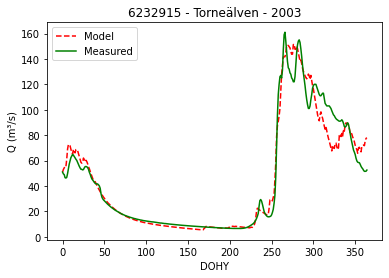

In [202]:
# Get images from Calibration Period

year = 2003

bas = 6232915


c = p.Setup_Model(basin = str(bas),path = 'D:/Master_Thesis/Model',info = 'DEM_Statistics_all_basins',height = 'Synth_Station_Heights',stations = 'Meteo_Stations_Info',year = year).get_data()

d = p.Model(x = c)

plt.figure()
plt.title('6232915 - Torneälven - {0}'.format(year))
plt.plot(d[0],'--',color = 'red', label = 'Model')
plt.plot(d[1], color = 'green', label = 'Measured')
plt.legend(loc="upper left")
plt.xlabel('DOHY')
plt.ylabel('Q (m³/s)')

plt.savefig('D:/Scientific_Writing/Figures/{0}.tif'.format(year), dpi = 300, bbox_inches = 'tight')


#p.r_squared_help(d[0],d[1])
#p.dv_help(d[0],d[1])

X :1.063,Y :0.031,Cs :0.18,Cp :0.22,ddf :0.48


0.8558016277527498

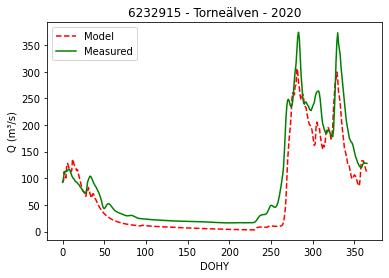

In [29]:
# Get images from Validation Period

year = 2020

bas = 6232915


summary = p.Setup_Model(basin = bas,path = 'D:/Master_Thesis/Model',info = 'DEM_Statistics_all_basins',height = 'Synth_Station_Heights',
                 stations = 'Meteo_Stations_Info').param_summary()
parameters = summary['Mean'].drop(labels = 'R2').to_list()

c = p.Setup_Model(basin = str(bas),path = 'D:/Master_Thesis/Model',info = 'DEM_Statistics_all_basins',height = 'Synth_Station_Heights',stations = 'Meteo_Stations_Info',year = year).get_data_free()

d = p.Model_free(p = parameters, x = c)

plt.figure()
plt.title('6232915 - Torneälven - {0}'.format(year))
plt.plot(d[0],'--',color = 'red', label = 'Model')
plt.plot(d[1], color = 'green', label = 'Measured')
plt.legend(loc="upper left")
plt.xlabel('DOHY')
plt.ylabel('Q (m³/s)')

#plt.savefig('D:/Scientific_Writing/Figures/2010.tif', dpi = 300, bbox_inches = 'tight')


p.r_squared_help(d[0],d[1])
#p.dv_help(d[0],d[1])

In [106]:
year = 2016

bas = 6232915

c = p.Setup_Model(basin = str(bas),path = 'D:/Master_Thesis/Model',info = 'DEM_Statistics_all_basins',height = 'Synth_Station_Heights',stations = 'Meteo_Stations_Info',year = year).get_data()

d = p.Model(x = c)

plt.figure()
plt.title('6232915 - Torneälven - {0}'.format(year))
plt.plot(d[0],'--',color = 'red', label = 'Model')
plt.plot(d[1], color = 'green', label = 'Measured')
plt.legend(loc="upper left")
plt.xlabel('DOHY')
plt.ylabel('Q (m³/s)')

#plt.savefig('D:/Scientific_Writing/Figures/2001.tif', dpi = 300, bbox_inches = 'tight')

KeyError: 2016